# Pattern Recognition_Project 1(Part 2)

Remove html tags

https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string

In [10]:
import re

def cleanhtml(file):
  cleanr = re.compile("(<.*?>)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
  cleantext = re.sub(cleanr, '', file)
  cleantext =''.join([i for i in cleantext if not i.isdigit()])
  return cleantext

Read all text files from a folder

https://automating-gis-processes.github.io/FEC/Day3-reading-files.html

In [2]:
import glob

DataPathList_Train_Pos = glob.glob('C:/Users/hell/Desktop/term1/Project1 PR/aclImdb_v1/aclImdb/train/pos/*.txt')
print(len(DataPathList_Train_Pos) )  #number of items

DataPathList_Train_Neg = glob.glob('C:/Users/hell/Desktop/term1/Project1 PR/aclImdb_v1/aclImdb/train/neg/*.txt')
print(len(DataPathList_Train_Neg) )  #number of items

DataPathList_Test_Pos = glob.glob('C:/Users/hell/Desktop/term1/Project1 PR/aclImdb_v1/aclImdb/test/pos+/*.txt')
print(len(DataPathList_Test_Pos) )  #number of items

DataPathList_Test_Neg = glob.glob('C:/Users/hell/Desktop/term1/Project1 PR/aclImdb_v1/aclImdb/test/neg-/*.txt')
print(len(DataPathList_Test_Neg) )  #number of items

Data_Train= []
Data_Test= []

for fp in DataPathList_Train_Pos:

    with open(fp, 'r') as f:
       text = f.read()
       text=cleanhtml(text)
       Data_Train.append(text)

for fp in DataPathList_Train_Neg:

    with open(fp, 'r') as f:
       text = f.read()
       text=cleanhtml(text)
       Data_Train.append(text)

for fp in DataPathList_Test_Pos:

    with open(fp, 'r') as f:
       text = f.read()
       text=cleanhtml(text)
       Data_Test.append(text)

for fp in DataPathList_Test_Neg:

    with open(fp, 'r') as f:
       text = f.read()
       text=cleanhtml(text)
       Data_Test.append(text)

12500
12500
2500
2500


In [18]:
import glob
TEST = glob.glob('C:/Users/hell/Desktop/term1/Project1 PR/aclImdb_v1/aclImdb/test/TEST/*.txt')
print(len(TEST) )  #number of items
Data_Test= []
for fp in TEST:

    with open(fp, 'r') as f:
       text = f.read()
       text=cleanhtml(text)
       Data_Test.append(text)

matrix_test=vectorizer.transform(Data_Test)
print(matrix_test.shape)

1
(1, 5310002)


In [27]:

np.save('Data_TrainP2.npy', Data_Train)
np.save('Data_TestP2.npy', Data_Test)

In [2]:
import numpy as np
Data_Train=np.load('Data_TrainP2.npy')
Data_Test=np.load('Data_TestP2.npy')

Tfidf

https://www.quora.com/How-are-TF-IDF-vectorizers-with-n-gram-features-created

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm=None, ngram_range=(1,3))
vectorizer.fit(Data_Train)
matrix_train=vectorizer.transform(Data_Train)
print(matrix_train.shape)
matrix_test=vectorizer.transform(Data_Test)
print(matrix_test.shape)

(25000, 5310002)
(5000, 5310002)


In [4]:
from sklearn.cross_validation import train_test_split

Class = [1 if i < 12500 else 0 for i in range(25000)]

data_train, data_validation, class_train, class_validation = train_test_split(
    matrix_train, Class, test_size=0.33, random_state=42
)

C:\Users\hell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Random Forest Classifier



In [5]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=50,max_depth=5)
clf2.fit(data_train, class_train )
predicted = clf2.predict(data_validation)

Calculate Accuracy_score,confusion_matrix And Draw roc_curve, auc

http://scikit-learn.org/0.16/auto_examples/model_selection/plot_roc.html#example-model-selection-plot-roc-py

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
import matplotlib.pyplot as plt

print ('Accuracy with Train Test Split :',accuracy_score(class_validation,predicted)*100)

Accuracy with Train Test Split : 72.7878787878788


[1]
Test set Accuracy: 0.0
confusion_matrix:
 [[0 1]
 [0 0]]


C:\Users\hell\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


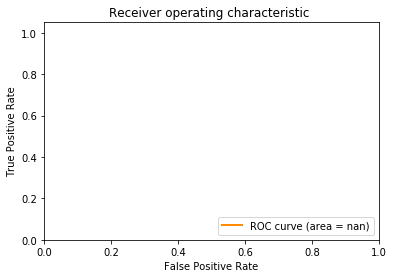

In [19]:
Class = [0]
predicted = clf2.predict(matrix_test)
print(predicted)
print ("Test set Accuracy:"  , accuracy_score(Class, predicted)*100)
print ('confusion_matrix:\n',confusion_matrix(Class,predicted))

fpr = []
tpr = []
roc_auc = []
fpr, tpr,_ = roc_curve(Class, predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()